# survival_analysis cox proportional model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy


In [5]:
## taking sample dataset from big chunk of billion data store
df = pd.read_json("input.json" ,lines = True)
df  = pd.get_dummies(df, columns=['gender' , 'DeviceOS_value'])

df.loc[df["age"]==-1 , "age"] = 25 # 25 is median of unique ages
df["mean_val"] = (df["max_val"] - df["min_val"])/df["frequency_of_appearence_in_days"]
df["mean_val"] = df.mean_val.astype("int")


In [3]:
df


,IAB,age,dp_ct,frequency_app_update,frequency_of_appearence_in_days,id,life,max_hop,max_val,mean_hop,...,DeviceOS_value_Windows 8,DeviceOS_value_Windows 8.1,DeviceOS_value_Windows Phone,DeviceOS_value_Windows RT,DeviceOS_value_Windows Vista,DeviceOS_value_Windows XP,DeviceOS_value_android,DeviceOS_value_iOS,DeviceOS_value_ios,mean_val
0,{},25,3,0,7,000174f2-5996-4c0f-9e88-ac6dd089c214,459,160,491,76,...,0,0,0,0,0,0,1,0,0,65
1,{},25,1,0,34,0002ef1a-ae5b-4144-ba6e-8aeddb9e3426,498,50,640,15,...,0,0,0,0,0,0,1,0,0,14
2,NaN,25,1,0,7,000343f5-26d7-49d1-a3b8-25fe84f04105,330,280,332,47,...,0,0,0,0,0,0,1,0,0,47
3,"{'IAB19': 213, 'IAB22': 213, 'IAB3': 213, 'IAB...",25,4,0,37,0003d0d5-beaa-4876-b382-adfd43ea45a2,458,39,640,12,...,0,0,0,0,0,0,0,0,0,12
4,"{'IAB12': 213, 'IAB22': 213, 'IAB3': 213}",50,2,0,6,00077668-d459-4de6-b0e1-e57d2e8e4443,90,30,112,18,...,0,0,0,0,0,0,1,0,0,15
5,"{'IAB17_44': 213, 'IAB22': 213, 'IAB3_4': 213}",25,2,0,2,0007c748-b408-474e-8444-cafcb5f5eb53,389,389,561,389,...,0,0,0,0,0,0,0,0,0,194
6,"{'IAB12': 213, 'IAB19': 213, 'IAB1_7': 213, 'I...",21,5,6,23,000853b8-16f5-41ab-9c2e-e6a85c84289a,220,10,222,9,...,0,0,0,0,0,0,1,0,0,9
7,{'IAB22': 213},25,3,0,10,00095ed6-6337-4070-8541-e856b6e2a8a1,439,269,581,48,...,0,0,0,0,0,0,0,0,0,43
8,"{'IAB19': 213, 'IAB9': 213, 'IAB9_7': 213}",25,4,0,18,000aab14-5cb2-4eec-a2b7-553afd39e7c6,628,340,630,34,...,0,0,0,0,0,0,0,0,0,34
9,{'IAB22': 213},25,4,3,4,000ab800-a390-4764-a7df-409529fa7999,30,10,162,10,...,0,0,0,0,0,0,1,0,0,7


In [4]:
df_1 = df.drop(["IAB","id","life"] , axis = 1)

In [168]:
df.describe()

,age,dp_ct,frequency_app_update,frequency_of_appearence_in_days,life,max_hop,max_val,mean_hop,min_val,gender_Female,...,DeviceOS_value_Windows 8,DeviceOS_value_Windows 8.1,DeviceOS_value_Windows Phone,DeviceOS_value_Windows RT,DeviceOS_value_Windows Vista,DeviceOS_value_Windows XP,DeviceOS_value_android,DeviceOS_value_iOS,DeviceOS_value_ios,mean_val
count,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,...,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06,9.927383e+06
mean,2.482576e+01,2.693251e+00,3.428330e+00,1.491845e+01,2.489184e+02,8.881304e+01,4.084986e+02,3.559260e+01,1.595802e+02,7.038471e-02,...,1.510972e-06,5.842426e-06,2.518287e-06,2.014630e-07,1.007315e-07,2.014630e-07,4.584452e-01,3.655948e-03,1.388040e-02,2.674247e+01
std,4.795830e+00,1.487420e+00,8.229642e+00,1.452533e+01,1.872116e+02,1.109585e+02,1.750571e+02,5.870878e+01,1.752746e+02,2.557943e-01,...,1.229215e-03,2.417104e-03,1.586909e-03,4.488462e-04,3.173822e-04,4.488462e-04,4.982702e-01,6.035381e-02,1.169946e-01,3.619368e+01
min,1.800000e+01,1.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,9.000000e+00,1.200000e+01,5.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.500000e+01,1.000000e+00,0.000000e+00,4.000000e+00,8.000000e+01,1.900000e+01,2.820000e+02,1.000000e+01,2.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
50%,2.500000e+01,2.000000e+00,0.000000e+00,9.000000e+00,2.100000e+02,4.000000e+01,4.410000e+02,1.300000e+01,8.200000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
75%,2.500000e+01,4.000000e+00,2.000000e+00,2.100000e+01,3.890000e+02,1.190000e+02,5.510000e+02,3.100000e+01,3.020000e+02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01
max,1.000000e+02,1.100000e+01,2.670000e+02,6.200000e+01,6.380000e+02,6.380000e+02,6.400000e+02,6.280000e+02,6.300000e+02,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.190000e+02


# mean hop as duration parameter

In [10]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_1, duration_col='mean_hop', show_progress=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:1033: ConvergenceWarning: Column(s) ['gender_O', 'DeviceOS_value_BlackBerry OS', 'DeviceOS_value_Linux', 'DeviceOS_value_Mac OS X', 'DeviceOS_value_MeeGo', 'DeviceOS_value_Other', 'DeviceOS_value_Symbian OS', 'DeviceOS_value_Ubuntu', 'DeviceOS_value_Windows 10', 'DeviceOS_value_Windows 7', 'DeviceOS_value_Windows 8', 'DeviceOS_value_Windows 8.1', 'DeviceOS_value_Windows Phone', 'DeviceOS_value_Windows RT', 'DeviceOS_value_Windows Vista', 'DeviceOS_value_Windows XP'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 9: norm_delta = 0.00000, step_size = 1.0000, ll = -140550948.94240, newton_decrement = 0.00000, seconds_since_start = 345.4Convergence completed after 9 iterations.


<lifelines.CoxPHFitter: fitted with 9.92738e+06 total observations, 0 right-censored observations>

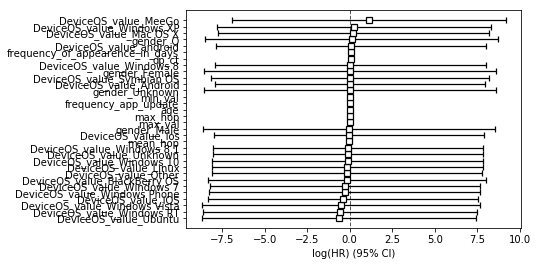

In [12]:
cph.plot()

# max hop as duration parameter

In [8]:
from lifelines import CoxPHFitter

cph1 = CoxPHFitter(penalizer=0.1)
cph1.fit(df_1, duration_col='max_hop', show_progress=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:1033: ConvergenceWarning: Column(s) ['gender_O', 'DeviceOS_value_BlackBerry OS', 'DeviceOS_value_Linux', 'DeviceOS_value_Mac OS X', 'DeviceOS_value_MeeGo', 'DeviceOS_value_Other', 'DeviceOS_value_Symbian OS', 'DeviceOS_value_Ubuntu', 'DeviceOS_value_Windows 10', 'DeviceOS_value_Windows 7', 'DeviceOS_value_Windows 8', 'DeviceOS_value_Windows 8.1', 'DeviceOS_value_Windows Phone', 'DeviceOS_value_Windows RT', 'DeviceOS_value_Windows Vista', 'DeviceOS_value_Windows XP'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 8: norm_delta = 0.00000, step_size = 1.0000, ll = -139885689.37611, newton_decrement = 0.00000, seconds_since_start = 306.8Convergence completed after 8 iterations.


<lifelines.CoxPHFitter: fitted with 9.92738e+06 total observations, 0 right-censored observations>

In [15]:
from matplotlib import pyplot as plt
cph1.predict_survival_function(df_1.head())

,0,1,2,3,4
T,,,,,
9.0,1.000000e+00,0.999981,9.999993e-01,9.998769e-01,9.994754e-01
10.0,9.999948e-01,0.993234,9.997619e-01,9.573511e-01,8.304455e-01
19.0,9.999933e-01,0.991264,9.996923e-01,9.452247e-01,7.865231e-01
20.0,9.999866e-01,0.982744,9.993897e-01,8.942713e-01,6.210475e-01
29.0,9.999862e-01,0.982162,9.993689e-01,8.908751e-01,6.110553e-01
30.0,9.999785e-01,0.972375,9.990180e-01,8.353989e-01,4.645706e-01
39.0,9.999671e-01,0.958031,9.984974e-01,7.593762e-01,3.093255e-01
40.0,9.999516e-01,0.938929,9.977924e-01,6.672755e-01,1.782598e-01
49.0,9.999446e-01,0.930412,9.974736e-01,6.293590e-01,1.389153e-01


In [22]:
df_2 = df_1[["dp_ct" , "frequency_app_update","frequency_of_appearence_in_days" , "max_val","mean_val","mean_hop","min_val","max_hop"]]

In [23]:
cph2 = CoxPHFitter(penalizer=0.1)
cph2.fit(df_2, duration_col='max_hop', show_progress=True)

Iteration 8: norm_delta = 0.00000, step_size = 1.0000, ll = -139887478.69458, newton_decrement = 0.00000, seconds_since_start = 36.3Convergence completed after 8 iterations.


<lifelines.CoxPHFitter: fitted with 9.92738e+06 total observations, 0 right-censored observations>

In [24]:
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 9.92738e+06 total observations, 0 right-censored observations>
      duration col = 'max_hop'
         penalizer = 0.1
number of observations = 9927383.0
number of events observed = 9927383.0
partial log-likelihood = -139887478.69
  time fit was run = 2019-12-23 09:48:08 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
dp_ct                           -0.03      0.97      0.00           -0.03           -0.03                0.97                0.97
frequency_app_update            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
frequency_of_appearence_in_days  0.28      1.32      0.00            0.27            0.28                1.32                1.32
max_val                         -0.03      0.97      0.00           -0.03           -0.03                0.97                0.97
mean_val                        -

In [26]:
js = pd.read_json("json_new/test.json" , lines = True)
df = pd.read_json("json_new/test.json" , lines = True)
df["within_mean_hop"] = 1

we also find out the standard deviation for the mean_hop distribution . we checked which id's have max_hop within 1 standard deviation and for those id's the bloom filter is working correctly and it has seen those id's regularly in mean intervels and for those id's taking mean_hop and max_hop as duration parameter works differently for those id's prefer mean_hop as duration parameter.

In [60]:
df[df["within_mean_hop"]==0].count()

DeviceOS_value                     6690833
IAB                                6543140
age                                6690833
dp_ct                              6690833
frequency_app_update               6690833
frequency_of_appearence_in_days    6690833
gender                             6690833
id                                 6690833
life                               6690833
max_hop                            6690833
max_val                            6690833
mean_hop                           6690833
min_val                            6690833
standard_deviation                 6690833
within_mean_hop                    6690833
sum1                               6690833
dtype: int64

In [53]:
scipy.stats.gaussian_kde(df["mean_hop"].tolist())

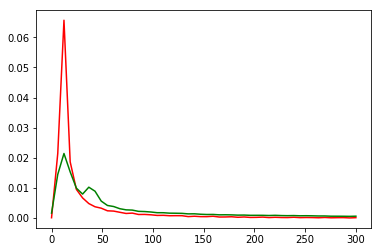

In [57]:
density = scipy.stats.gaussian_kde(df["mean_hop"].tolist())
density1 = scipy.stats.gaussian_kde(df["max_hop"].tolist())
xs = np.linspace(0,300)
plt.plot(xs,density(xs) , 'r')
plt.plot(xs,density1(xs) , 'g')
plt.show()

In [9]:
df1 = df.drop(["IAB" , "id" , "dp_ct"] , axis = 1)